### 서울시에서 일어나는 범죄와 체감 안전도
: 강남 3구의 안전도가 얼마나 되는지 또한 서울시 전체의 안전도가 얼마나 되는지를 확인

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [202]:
crime_anal_police = pd.read_csv("../Data/crime_in_Seoul.csv", encoding='euc-kr')
crime_anal_police.head()
crime_anal_police.tail()
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704"
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015"
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227"
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519"
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961"


In [203]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


> 절도발생검거,폭력발생검거 쉼표 제거하고 int로 변환해야

In [204]:
# 경찰서 위치 정보
police_address=pd.read_csv("../Data/SeoulPoliceAddress.csv")
police_address.head()
police_address.tail()
police_address


,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16
5,서울용산경찰서,(02)2198-0267,(02)2198-0325,서울 용산구 원효로89길 24
6,서울성북경찰서,(02)920-1324,(02)920-1661,서울 성북구 보문로 170
7,서울동대문경찰서,(02)3295-0110,(02)961-4849,서울 동대문구 약령시로21길 29
8,서울마포경찰서,(02)3149-6324,(02)3149-6327,서울 마포구 마포대로 183
9,서울영등포경찰서,(02)2118-9324,(02)2118-9461,서울시 영등포구 국회대로 608


crime_anal_police의 관서명을 police_address의 경찰관서와 일치시키기
- 중부서->서울중부경찰서

In [205]:
# 방법 1:
station_name = []
for name in crime_anal_police['관서명']:
    station_name.append('서울'+name[:-1]+'경찰서')
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [ ]:
# 방법 2:
# station_name = list("서울"+crime_anal_police['관서명'].str[:-1]+'경찰서')
# station_name

In [206]:
len(station_name) == len(police_address)

True

In [207]:
police_address

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16
5,서울용산경찰서,(02)2198-0267,(02)2198-0325,서울 용산구 원효로89길 24
6,서울성북경찰서,(02)920-1324,(02)920-1661,서울 성북구 보문로 170
7,서울동대문경찰서,(02)3295-0110,(02)961-4849,서울 동대문구 약령시로21길 29
8,서울마포경찰서,(02)3149-6324,(02)3149-6327,서울 마포구 마포대로 183
9,서울영등포경찰서,(02)2118-9324,(02)2118-9461,서울시 영등포구 국회대로 608


In [214]:
# crime_anal_police에 구별 컬럼 추가
crime_anal_police['구별'] = list(crime_anal_police['관서명'].str[:-1]+'구')
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중부구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,남대문구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,혜화구
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704",용산구
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015",성북구
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227",동대문구
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519",마포구
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961",영등포구


In [226]:
# 잘못된 구 컬럼 replace
crime_anal_police.loc[crime_anal_police['관서명']=='중부서',['구별']] = '중구'
crime_anal_police.loc[crime_anal_police['관서명']=='남대문서',['구별']] = '중구'
crime_anal_police.loc[crime_anal_police['관서명']=='종암서',['구별']] = '성북구'
crime_anal_police.loc[crime_anal_police['관서명']=='서부서',['구별']] = '은평구'
crime_anal_police.loc[crime_anal_police['관서명']=='방배서',['구별']] = '서초구'
crime_anal_police.loc[crime_anal_police['관서명']=='수서서',['구별']] = '강남구'
crime_anal_police.loc[crime_anal_police['관서명']=='혜화서',['구별']] = '종로구'
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704",용산구
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015",성북구
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227",동대문구
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519",마포구
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961",영등포구


In [227]:
len(crime_anal_police['구별'].unique())

25

> 서울시 구는 25개 구로 되어있는데 23개 구만 보임   
> 서울시 구는 25개 구로 되어있는데 겅찰서 수는 31개임

In [228]:
# 관서명과 구별 이름 확인
crime_anal_police.loc[:,['관서명']]

,관서명
0,중부서
1,종로서
2,남대문서
3,서대문서
4,혜화서
5,용산서
6,성북서
7,동대문서
8,마포서
9,영등포서


In [229]:
# DataSet을 보면 금천서가 관악구로 편성되어 있는데 금천서는 금천구로 편성
crime_anal_police[crime_anal_police['관서명']=='금천서']
crime_anal_police.loc[crime_anal_police['관서명']=='금천서',['구별']] = '금천구'
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704",용산구
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015",성북구
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227",동대문구
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519",마포구
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961",영등포구


In [230]:
# DataSet을 보면 강서서가 양천구로 편성되어 있는데 강서서는 강서구로 편성
crime_anal_police[crime_anal_police['관서명']=='강서서']
crime_anal_police.loc[crime_anal_police['관서명']=='강서서',['구별']] = '강서구'
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704",용산구
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015",성북구
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227",동대문구
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519",마포구
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961",영등포구


In [231]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
 11  구별      31 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.0+ KB


In [232]:
# 절도발생, 절도검거, 폭력발생, 폭력검거를 정수 타입으로 변환
crime_anal_police['절도 발생'] = crime_anal_police['절도 발생'].str.replace(",","").astype('int')
crime_anal_police['절도 검거'] = crime_anal_police['절도 검거'].str.replace(",","").astype('int')
crime_anal_police['폭력 발생'] = crime_anal_police['폭력 발생'].str.replace(",","").astype('int')
crime_anal_police['폭력 검거'] = crime_anal_police['폭력 검거'].str.replace(",","").astype('int')

In [233]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
 11  구별      31 non-null     object
dtypes: int64(10), object(2)
memory usage: 3.0+ KB


In [236]:
# 각 범죄율 검거율 구하기
crime_anal = pd.pivot_table(crime_anal_police,index='구별',aggfunc=sum)
crime_anal

/var/folders/k_/0wcctvbj41ncld1_xmh98p6w0000gn/T/ipykernel_60369/1536914108.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  crime_anal = pd.pivot_table(crime_anal_police,index='구별',aggfunc=sum)


,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625
구로구,164,281,11,15,6,8,889,2335,2432,3007
금천구,122,151,6,6,4,3,888,1567,1776,2054
노원구,121,197,7,7,10,10,801,2193,2329,2723


In [237]:
# 각 범죄별 검거율 구하기
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

In [238]:
crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,185.714286,100.000000,42.200925,83.047619
구로구,164,281,11,15,6,8,889,2335,2432,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,122,151,6,6,4,3,888,1567,1776,2054,80.794702,100.000000,133.333333,56.668794,86.465433
노원구,121,197,7,7,10,10,801,2193,2329,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [239]:
crime_anal.drop(columns=['강간 검거','강도 검거','살인 검거','절도 검거','폭력 검거'],inplace=True)

In [240]:
crime_anal[crime_anal.iloc[:,5:]>100]=100
crime_anal

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [241]:
crime_anal.rename(columns={
    '강간 발생':'강간',
    '강도 발생':'강도',
    '살인 발생':'살인',
    '절도 발생':'절도',
    '폭력 발생':'폭력'
},inplace=True
)
crime_anal

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


### 데이터의 정규화 (Normalization)
- 강도와 살인은 2자릿수이나 절도와 폭력은 4자리입니다.
- 각각의 범죄 발생 건수를 비슷한 범위에 놓고 비교하는 것이 편리.
- 각 항목의 값을 최대 1로 계산한다. (비중)

In [ ]:
# !pip install sklearn

In [ ]:
# !pip install scikit-learn

In [242]:
# 머신러닝 모듈
# sklearn의 preprocessing기능을 사용하면 최댓값과 최솟값을 비교하면서 정규화가 진행
from sklearn import preprocessing

In [243]:
# 정규화를 진행할 컬럼 설정
col = ['강간','강도','살인','절도','폭력']

In [244]:
x = crime_anal[col].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [245]:
# 최대값과 최소값 가져오기
min_max_scaler = preprocessing.MinMaxScaler()

In [246]:
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled
# 각 컬럼별로 최대, 최소값을 1, 0으로 놓고 정규화

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [247]:
# 정규화된 범죄건수가 있는 데이터프레임 생성
crime_anal_norm = pd.DataFrame(x_scaled,columns=col,index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [248]:
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

In [249]:
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


---
### CCTV 데이터와 합치기
: 구별 CCTV 수와 인구수를 가ㅏ져와서 범죄율과 얼마나 상관성이 있는지 확인

In [250]:
result_CCTV = pd.read_csv("../Data/CCTV_result.csv", index_col='구별')
result_CCTV
len(result_CCTV.index)

25

In [251]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665


In [252]:
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,365990,1581
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951,438308,3227
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,251370,1634
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665,535495,1906


In [253]:
# 범죄 발생건수를 합하여 범죄 컬럼 생성
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,365990,1581,2.204979
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951,438308,3227,2.603930
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,251370,1634,0.666924
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665,535495,1906,1.905445


In [254]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,368.622261
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,365990,1581,2.204979,416.915211
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951,438308,3227,2.603930,325.647079
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,251370,1634,0.666924,423.928929
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665,535495,1906,1.905445,383.477292


---
### Seaborn을 활용한 시각화

In [255]:
import seaborn as sns

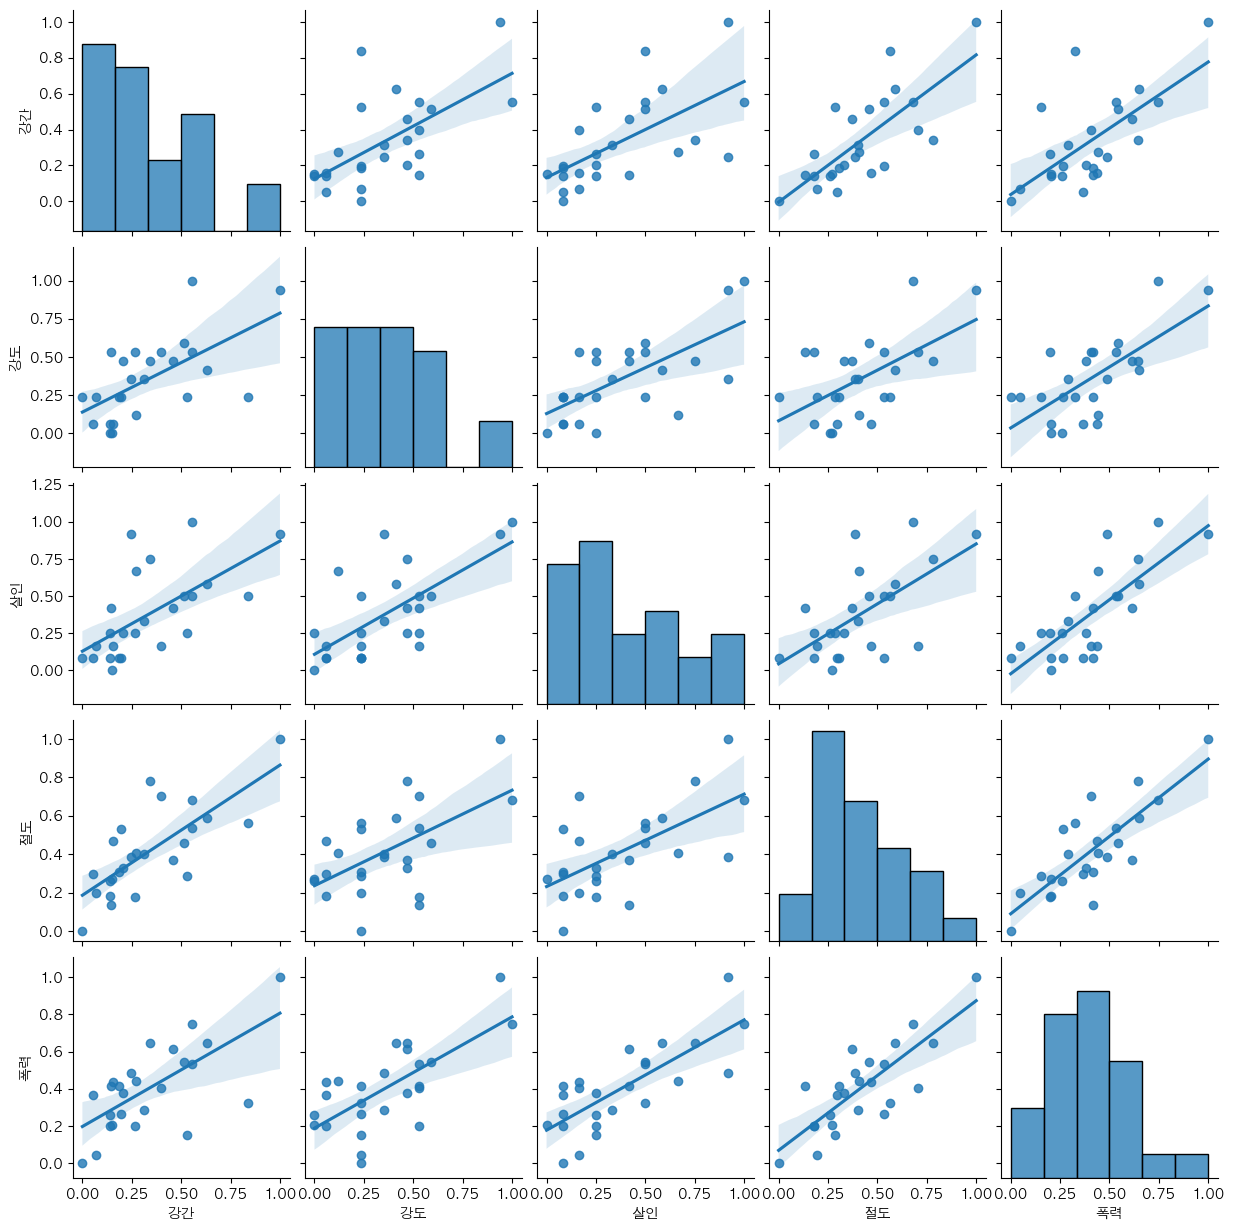

In [256]:
# 강간, 강도, 살인, 폭력, 절도 건수에 대한 상관관계 시각화
sns.pairplot(
    crime_anal_norm,
    vars = ['강간','강도','살인','절도','폭력'],
    kind='reg'
)
plt.show()

### CCTV와 살인 강도에 대한 그래프

### 인구수, CCTV와 살인검거율, 폭력검거율

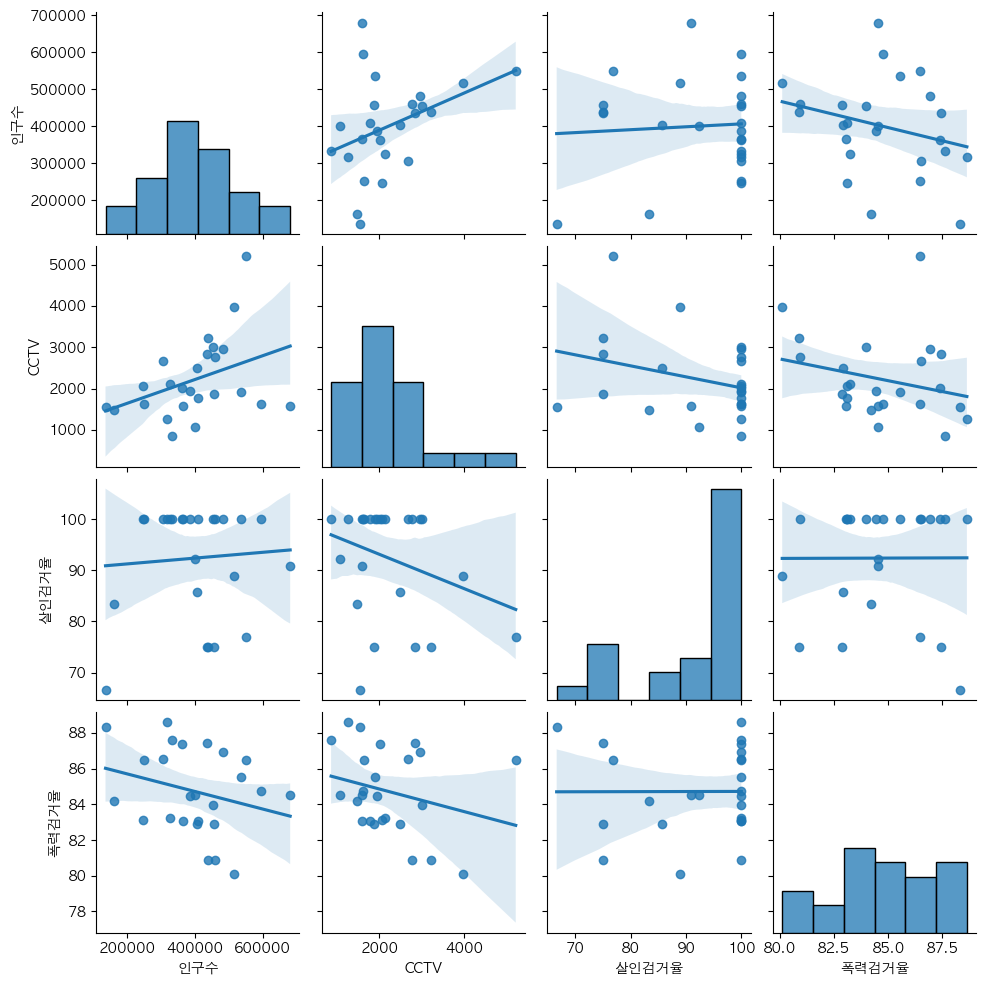

In [257]:
sns.pairplot(
    crime_anal_norm,
    vars = ['인구수','CCTV','살인검거율','폭력검거율'],
    kind='reg'
)
plt.show()

### Heatmap을 이용한 전체 검거율 확인

In [258]:
# 검거 최대값 가져오기
crime_anal_norm['검거'] = crime_anal_norm['검거']/100

In [259]:
# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거',ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,333495,858,0.318627,4.325932
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,251370,1634,0.666924,4.239289
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,595703,1617,2.333944,4.177674
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,365990,1581,2.204979,4.169152
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,362793,2003,1.633921,4.128853


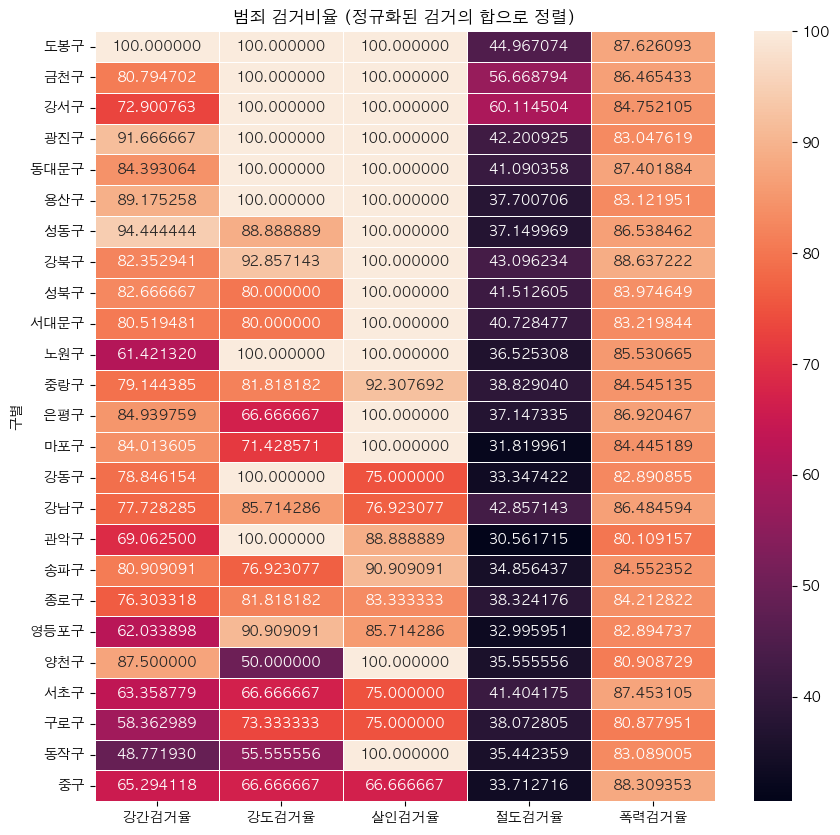

In [260]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot=True,
    fmt='f',
    linewidths=0.5
)
plt.title('범죄 검거비율 (정규화된 검거의 합으로 정렬)')
plt.show()

### 지도 출력

In [261]:
import json
import folium

In [262]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding='utf-8'))
map = folium.Map(
    location=[37.55,126.98],
    zoom_start=11,
    tiles='Stamen Toner'
)

folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm_sort,
    columns=[crime_anal_norm_sort.index,'강간'],
    fill_color='PuRd',
    key_on='feature.properties.name' # 실제로 어떻게 되어있든 feature로 통일해서 입력해야 됨.
).add_to(map)
map

In [263]:
crime_anal_norm_sort

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,333495,858,0.318627,4.325932
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,251370,1634,0.666924,4.239289
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,4.177674
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,365990,1581,2.204979,4.169152
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.000000,100.000000,41.090358,87.401884,362793,2003,1.633921,4.128853
용산구,0.265130,0.529412,0.250000,0.177252,0.201287,89.175258,100.000000,100.000000,37.700706,83.121951,246165,2063,1.423080,4.099979
성동구,0.069164,0.235294,0.166667,0.195192,0.044691,94.444444,88.888889,100.000000,37.149969,86.538462,307193,2679,0.711008,4.070218
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,4.069435
성북구,0.138329,0.000000,0.250000,0.259060,0.258134,82.666667,80.000000,100.000000,41.512605,83.974649,454532,3003,0.905522,3.881539


In [264]:
# 인구대비 범죄율 지도 출력: 범죄/인구수*100000 => 10만명 당 범죄비율
